# IITM - MLP - Week 5

## Imports

In [208]:
# ---------- Common ------------
import os
import time
import json
import random
import ast
from datetime import datetime
from collections import Counter
from pprint import pprint

# ---------- Data Manipulation ------------
import pandas as pd
import numpy as np

# ---------- Data Visualization ------------
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# ---------- Sklearn ------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import permutation_test_score

from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer

# ---------- Sklearn ML Models ------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier

# ---------- Sklearn Metrics ------------
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import hinge_loss
from sklearn.metrics import make_scorer

# ---------- Sklearn Abstract ------------
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

from sklearn.decomposition import PCA

from sklearn.feature_extraction import DictVectorizer

from sklearn import set_config

# ---------- Sklearn: Filter based ------------
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression

# ---------- Sklearn: Wrapper based ------------
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel

# ---------- Sklearn Datasets ------------
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import make_blobs
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_multilabel_classification

# ---------- Sklearn External Datasets ------------
from sklearn.datasets import fetch_openml

# ---------- Imblearn ------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# ---------- Scipy ------------
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import loguniform
from scipy.stats import uniform

# ---------- Extras ------------
import pickle
# pickle.dump(model, open(filename, 'wb'))
# loaded_model = pickle.load(open(filename, 'rb'))

import tempfile

## Presets

In [113]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

plt.style.use('seaborn')
sns.set_theme(style="whitegrid")
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
# sns.set_theme(style="ticks", rc=custom_params)

set_config(display='diagram')

# np.random.seed(306)
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

## Common helper functions

In [8]:
def display_scores(scores):
    print(f'Scores: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'Std Dev: {scores.std()}')
    return

def multiple_scores(y_true, y_pred):
    Functions = [explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score]
    Names = ("Explained variance score : ", "Max Error : ", "Mean Absolute Error :", "Mean Squared Error: ", "R squared score: ")
    for func,name in zip(Functions, Names):
        print(name, func(y_true, y_pred))
        
        
class uniform_int:
    """ Integer output of uniform disribution """
    def __init__(self):
        self._distribution = uniform(a,b)
    
    def rvs(self, *args, **kwargs):
        return self._distribution.rvs(*args, **kwargs).astype(int)

## Load Data: MNIST Digits

In [8]:
# Takes a lot of time for downloading dataset
# X, y = fetch_openml("mnist_784", version=1, return_X_y=True) # returns tuple of data dataframe and label dataframe
# print(f"Shape of X: {X.shape}") # pixels per image = 784 = 28*28
# print(f"Shape of y: {y.shape}")

## Shape of X: (70000, 784)
## Shape of y: (70000,)

Shape of X: (70000, 784)
Shape of y: (70000,)


# Data Exploration

## Data  type

In [12]:
print(f"Type of X: {type(X)}")
print(f"Type of y: {type(y)}")

Type of X: <class 'pandas.core.frame.DataFrame'>
Type of y: <class 'pandas.core.series.Series'>


In [10]:
X.head(1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
y.head(1)

0    5
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [13]:
# We are going to use perceptron classifier to predict digit from image
# perceptron classifier works for binary classification
# so we will predict wether digit is 0 or not.
# later model will be extended for multiclass classification

In [15]:
# Converts pandas object to np array
X = X.to_numpy()
y = y.to_numpy()

In [17]:
target_names = np.unique(y)

print(f"No. of samples: {X.shape[0]}")
print(f"Type: {X.dtype}")
print(f"Min val: {X.min()} | Max val: {X.max()}")
print(f"No. of classes: {len(target_names)}")
print(f"Type: {y.dtype}")
print(f"Labels: {target_names}")

No. of samples: 70000
Type: float64
Min val: 0.0 | Max val: 255.0
No. of classes: 10
Type: object
Labels: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


## Data Scaling

In [19]:
# X values range from 0 to 255. We can transform it to 0 and 1 using MinMaxScaler
X = MinMaxScaler().fit_transform(X)
print(f"Min val: {X.min()} | Max val: {X.max()}")

Min val: 0.0 | Max val: 1.0


## Data Visualization

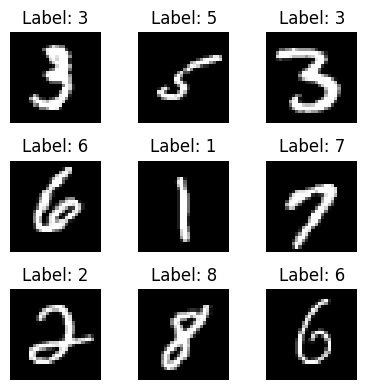

In [28]:
# Image visualization
n = 3
fig, ax = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(4,4))
offset = 10
for i in range(n):
    index = offset + i*n
    for j in range(n):
        ax[i,j].imshow(X[index+j].reshape(28,28), cmap="gray")
        ax[i,j].set_title(f"Label: {y[index+j]}")
        ax[i,j].set_axis_off()
plt.tight_layout()
plt.show()

## Data Spliting

In [29]:
# total 70000, train 60000, test 10000
samp = 60000
x_train, x_test, y_train, y_test = X[:samp], X[samp:], y[:samp], y[samp:] 

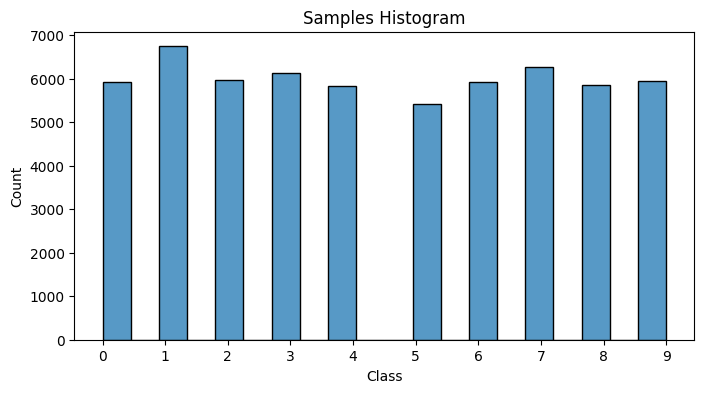

In [35]:
plt.figure(figsize=(8,4))
sns.histplot(data=np.int8(y_train), binwidth=0.45, bins=11)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Samples Histogram")
plt.show()

# Binary Classification: digit '0' detector

## Modify labels: -1,1

In [36]:
# We are using perceptron and its binary classifier so, we need to change labels from [0,1,2,3,4,5,6,7,8,9] to -1,1
# 0 label will be 1 and other will -1

y_train_0 = -1*np.ones((len(y_train)))
y_test_0 = -1*np.ones((len(y_test)))

indx_0 = np.where(y_train == "0") # find indexes of digit 0
y_train_0[indx_0] = 1

indx_0 = np.where(y_test == "0") # find indexes of digit 0
y_test_0[indx_0] = 1

## Sanity check

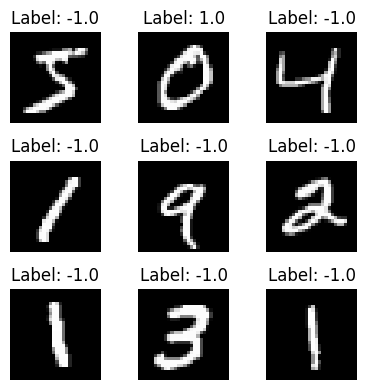

In [39]:
# Image visualization
n = 3
fig, ax = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(4,4))
offset = 0
for i in range(n):
    index = offset + i*n
    for j in range(n):
        ax[i,j].imshow(X[index+j].reshape(28,28), cmap="gray")
        ax[i,j].set_title(f"Label: {y_train_0[index+j]}")
        ax[i,j].set_axis_off()
plt.tight_layout()
plt.show()

## Baseline model

In [42]:
print(f"Number of 0 digits: {len(np.where(y_train_0==1)[0])}")
print(f"Number of other digits: {len(np.where(y_train_0==-1)[0])}")

Number of 0 digits: 5923
Number of other digits: 54077


In [49]:
54077/(54077+5923)

0.9012833333333333

In [45]:
# Now we can see that there is class imbalance
# only 10% data is +1 class
# if our model predicts output as -1 without training then the output accuracy will be 90.12 %

In [48]:
base_clf = DummyClassifier(strategy='most_frequent')
base_clf.fit(x_train, y_train_0)

print(f"Training accuracy: {round(base_clf.score(x_train, y_train_0), 3)}")
print(f"Test accuracy: {round(base_clf.score(x_test, y_test_0), 3)}")

Training accuracy: 0.901
Test accuracy: 0.902


In [50]:
# So accuracy is not a good measure

## Perceptron Model

In [53]:
# Perceptron() internally uses SGD to update weights and uses Hinge loss with 0 threshold
# it is same is SGDClassifier(loss="perceptron")

bin_clf = Perceptron(max_iter=100, random_state=1729)

In [55]:
bin_clf.fit(x_train, y_train_0)
print(f"Dim of weights: {bin_clf.coef_.shape}")
print(f"Bias: {bin_clf.intercept_}")

Dim of weights: (1, 784)
Bias: [-108.]


In [62]:
print(f"Training score: {round(bin_clf.score(x_train, y_train_0), 3)}")
print(f"Test score: {round(bin_clf.score(x_test, y_test_0), 3)}")

Training score: 0.991
Test score: 0.989


### Display Predictions

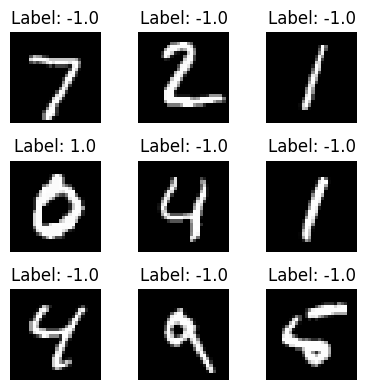

In [58]:
# Image visualization
y_hat_test_0 = bin_clf.predict(x_test)

n = 3
fig, ax = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(4,4))
offset = 0
for i in range(n):
    index = offset + i*n
    for j in range(n):
        ax[i,j].imshow(x_test[index+j].reshape(28,28), cmap="gray")
        ax[i,j].set_title(f"Label: {y_hat_test_0[index+j]}")
        ax[i,j].set_axis_off()
plt.tight_layout()
plt.show()

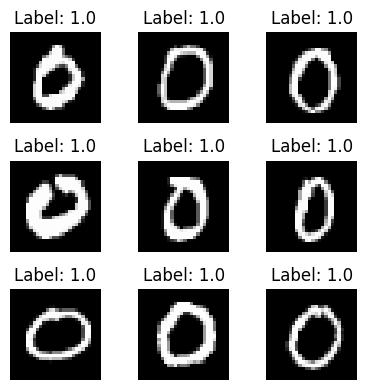

In [59]:
# Image visualization
indx_0 = np.where(y_test_0 == 1) # 0 digit images
zeroImgs = x_test[indx_0[0]]
zeroLabels = y_hat_test_0[indx_0[0]]

n = 3
fig, ax = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(4,4))
offset = 0
for i in range(n):
    index = offset + i*n
    for j in range(n):
        ax[i,j].imshow(zeroImgs[index+j].reshape(28,28), cmap="gray")
        ax[i,j].set_title(f"Label: {zeroLabels[index+j]}")
        ax[i,j].set_axis_off()
plt.tight_layout()
plt.show()

### Calc Accuracy

In [75]:
n_missclassified = np.count_nonzero(zeroLabels == -1) # number of times -1 occurs 
n_correctclassified = len(zeroLabels) - n_missclassified

print(f"Accuracy before: {n_correctclassified/len(zeroLabels)}") # 91%
# 91% images are correctly classified
# but its wrong because we are checking only those 0 digits which are correct classified
# we need to include non zero digits which are correct classified

indx_0 = np.where(y_test_0 == -1) # 0 digit images
nonzeroImgs = x_test[indx_0[0]]
nonzeroLabels = y_hat_test_0[indx_0[0]]
n_correctclassified = (len(zeroLabels) - np.count_nonzero(zeroLabels == -1)) + (len(nonzeroLabels) - np.count_nonzero(nonzeroLabels == 1))
print(f"Accuracy after: {n_correctclassified/(len(x_test))}") # 91%

Accuracy before: 0.9193877551020408
Accuracy after: 0.989


## Confusion Matrix

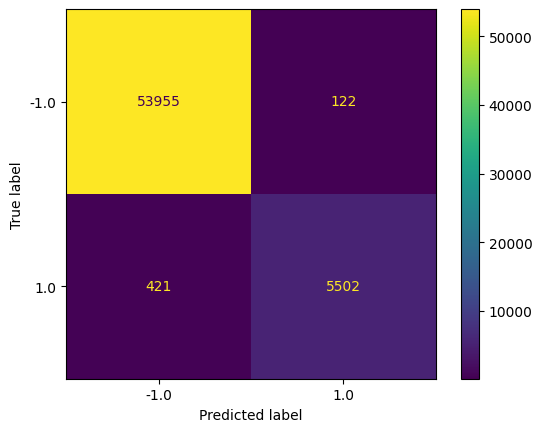

In [66]:
y_hat_train_0 = bin_clf.predict(x_train) # using training data
cm_disp = ConfusionMatrixDisplay.from_predictions(y_train_0, y_hat_train_0)
plt.show()

In [67]:
cm_disp.confusion_matrix

array([[53955,   122],
       [  421,  5502]], dtype=int64)

In [70]:
cm = cm_disp.confusion_matrix
tn = cm[0,0]
fn = cm[1,0]
fp = cm[0,1]
tp = cm[1,1]
print(f"TN: {tn}\tFP: {fp}\nFN: {fn}\t\tTP: {tp}")

TN: 53955	FP: 122
FN: 421		TP: 5502


In [71]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tn+tp)/(tn+fn+tp+fp)

print(f"Precision: {precision}\nRecall: {recall}\nAccuracy: {accuracy}")

Precision: 0.9783072546230441
Recall: 0.9289211548201924
Accuracy: 0.99095


## Cross Validation

In [84]:
scores = cross_validate(bin_clf,
                      x_train,
                      y_train_0,
                      cv=5,
                      scoring=['precision', 'recall', 'f1'],
                      return_estimator=True)

pprint(scores)

{'estimator': [Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729)],
 'fit_time': array([1.33398461, 2.22005749, 1.43468595, 1.29989195, 1.63331819]),
 'score_time': array([0.04296565, 0.04751277, 0.0325861 , 0.031214  , 0.03127861]),
 'test_f1': array([0.95238095, 0.91666667, 0.94915254, 0.94117647, 0.95091763]),
 'test_precision': array([0.95890411, 0.98828125, 0.95319149, 0.95090439, 0.96200345]),
 'test_recall': array([0.94594595, 0.85472973, 0.94514768, 0.93164557, 0.94008439])}


In [86]:
lst = [ [m, scores['test_'+m].mean(), scores['test_'+m].std()] for m in ['precision', 'recall', 'f1'] ]
metric_df = pd.DataFrame(lst, columns =['Metric', 'Mean', 'Std']) 
metric_df

,Metric,Mean,Std
0,precision,0.962657,0.013408
1,recall,0.923511,0.034765
2,f1,0.942059,0.013273


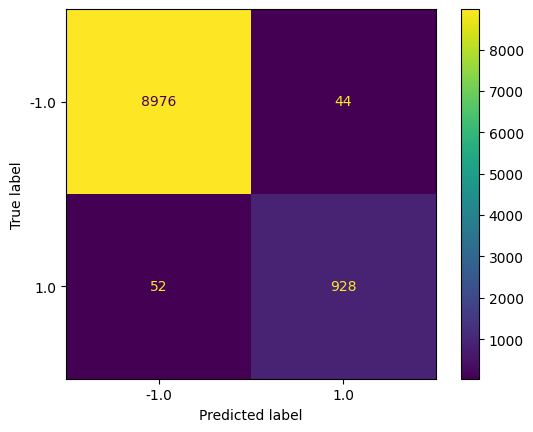

In [87]:
# 1st estimator got best f1 score so we will select that
bin_clf = scores['estimator'][0]
y_hat_test_0 = bin_clf.predict(x_test)
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test_0, y_hat_test_0)
plt.show()

In [88]:
cm = cm_disp.confusion_matrix
tn = cm[0,0]
fn = cm[1,0]
fp = cm[0,1]
tp = cm[1,1]
print(f"TN: {tn}\tFP: {fp}\nFN: {fn}\t\tTP: {tp}")

precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tn+tp)/(tn+fn+tp+fp)

print(f"Precision: {precision}\nRecall: {recall}\nAccuracy: {accuracy}")

TN: 8976	FP: 44
FN: 52		TP: 928
Precision: 0.9547325102880658
Recall: 0.9469387755102041
Accuracy: 0.9904


In [90]:
# Alternate way to use functions

precision = precision_score(y_test_0, y_hat_test_0)
recall = recall_score(y_test_0, y_hat_test_0)
print(f"Precision: {precision}\nRecall: {recall}")

Precision: 0.9547325102880658
Recall: 0.9469387755102041


In [92]:
print(classification_report(y_train_0, y_hat_train_0))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99     54077
         1.0       0.98      0.93      0.95      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



In [93]:
print(classification_report(y_test_0, y_hat_test_0))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99      9020
         1.0       0.95      0.95      0.95       980

    accuracy                           0.99     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.99      0.99      0.99     10000



## Ploting curves

### Decision function

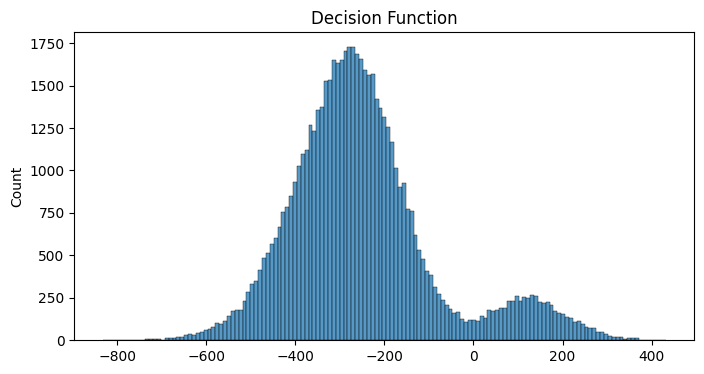

In [97]:
y_scores = bin_clf.decision_function(x_train)

plt.figure(figsize=(8,4))
sns.histplot(np.sort(y_scores))
plt.title("Decision Function")
plt.show()

In [99]:
# if threshold is set to -600 then all samples having score greater than -600 is set to 1 and others to -1

# dont pass predicted labels to precision_recall_curve 
# instead pass probability scores or decision function output

### PR Curve

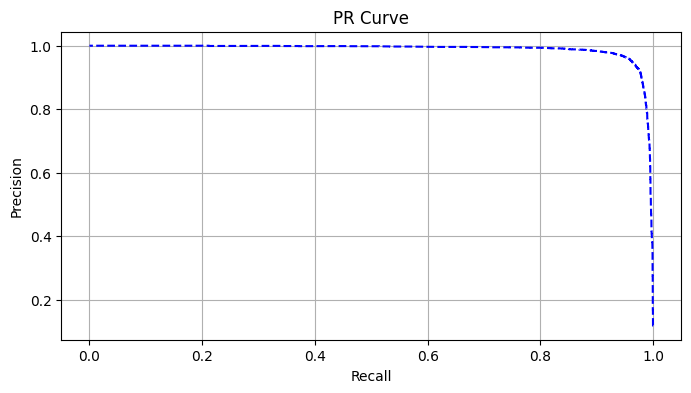

In [104]:
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores, pos_label=1)

plt.figure(figsize=(8,4))
plt.plot(recalls, precisions, "b--")
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("PR Curve")
plt.grid()
plt.show()

### Threshold Curve

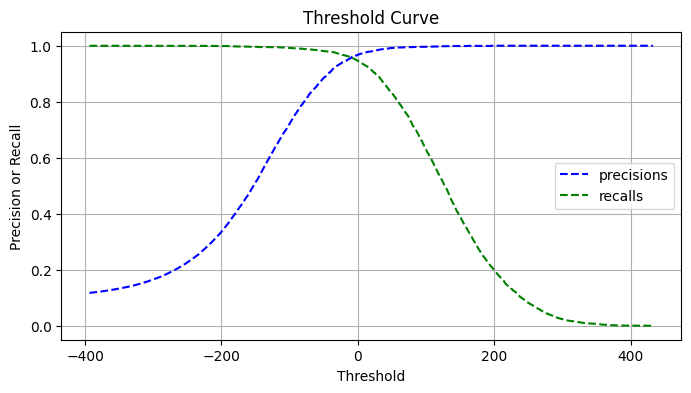

In [111]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="precisions")
plt.plot(thresholds, recalls[:-1], "g--", label="recalls")
plt.ylabel("Precision or Recall")
plt.xlabel("Threshold")
plt.title("Threshold Curve")
plt.grid()
plt.legend()
plt.show()

### ROC Curve

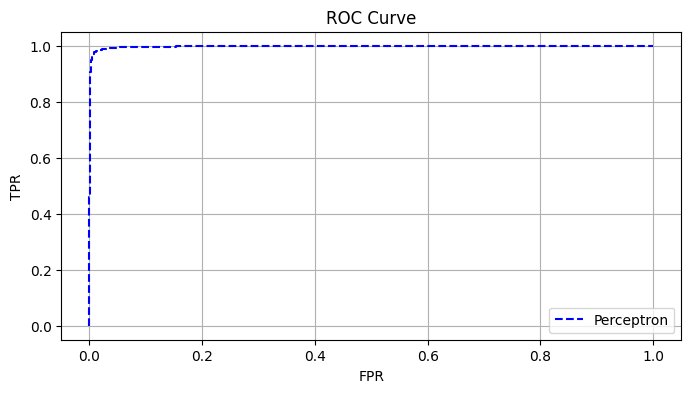

In [112]:
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

plt.figure(figsize=(8,4))
plt.plot(fpr, tpr, "b--", label="Perceptron")
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.title("ROC Curve")
plt.grid()
plt.legend()
plt.show()

# Multiclass Classification: One vs All

In [114]:
clf = Perceptron(random_state=1729)

In [115]:
y_train_ovr = LabelBinarizer().fit_transform(y_train)
print(f"Label shape: {y_train_ovr.shape}")

Label shape: (60000, 10)


In [117]:
clf.fit(x_train, y_train) # it internally creates 10 binary classifiers , so y_train_ovr is just for demo
print(f"Dim of weights: {clf.coef_.shape}")
print(f"Dim of Bias: {clf.intercept_.shape}")
print(f"Bias: {clf.intercept_}")

Dim of weights: (10, 784)
Dim of Bias: (10,)
Bias: [ -94.  -13.  -46.  -77.  -33.   23.  -85.   -6. -172.  -88.]


In [118]:
scores = clf.decision_function(x_train[6].reshape(1,-1))
print(scores)
print(f"Predicted class: {np.argmax(scores)}")

[[-631.88492118  154.366213    -65.23234141  -90.95338716 -189.29568627
  -137.14385236  -99.64604383 -159.09859285 -136.86391388 -199.26120723]]
Predicted class: 1


In [120]:
x_train[6].shape

(784,)

In [122]:
x_train[6].reshape(1,-1).shape

(1, 784)

In [123]:
y_hat = clf.predict(x_train)

In [124]:
print(classification_report(y_train, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5923
           1       0.94      0.98      0.96      6742
           2       0.89      0.90      0.90      5958
           3       0.86      0.87      0.87      6131
           4       0.89      0.94      0.91      5842
           5       0.81      0.88      0.85      5421
           6       0.92      0.97      0.94      5918
           7       0.91      0.94      0.92      6265
           8       0.92      0.77      0.84      5851
           9       0.92      0.82      0.87      5949

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.91      0.90      0.90     60000



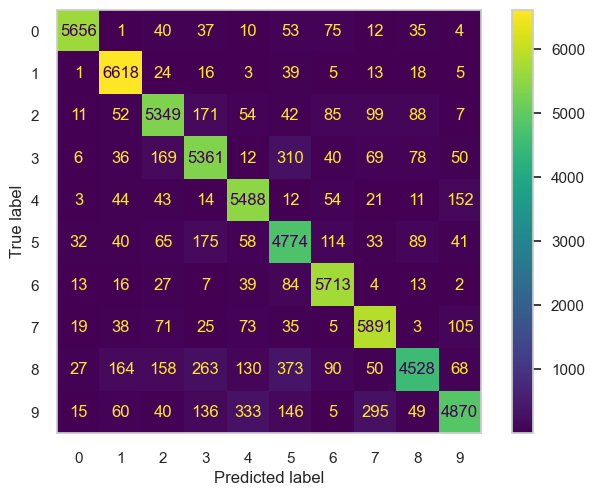

In [126]:
cm_disp = ConfusionMatrixDisplay.from_predictions(y_train, y_hat)
plt.grid(False)
plt.show()

## Using Pipeline

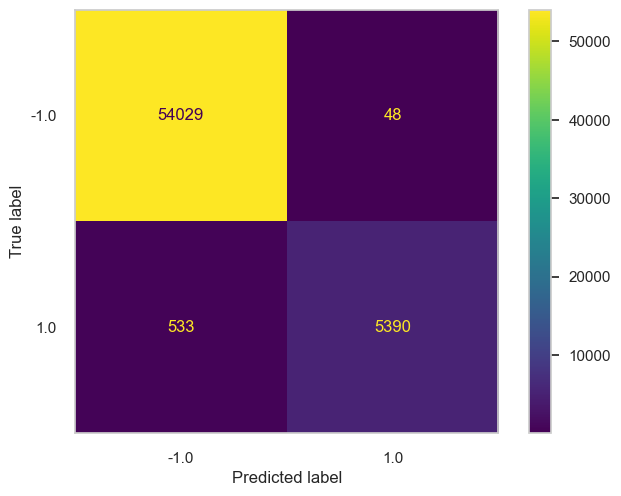

In [127]:
estimators = [('std_scaler', MinMaxScaler()),
             ('bin_clf', Perceptron())]
pipe = Pipeline(estimators)
pipe.fit(x_train, y_train_0)
y_hat_train_0 = pipe.predict(x_train)
cm_disp = ConfusionMatrixDisplay.from_predictions(y_train_0, y_hat_train_0)
plt.grid(False)
plt.show()

## Iteration Vs Loss

In [128]:
# using Partial fit param

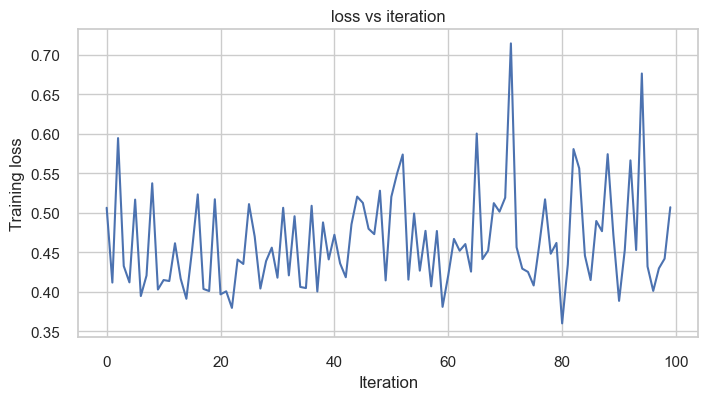

In [131]:
n_iter = 100
bin_clf1 = Perceptron(max_iter=1000, random_state=2094)
loss_clf1 = []
for i in range(n_iter):
    bin_clf1.partial_fit(x_train, y_train_0, classes=np.array([1,-1]))
    y_hat_0 = bin_clf1.decision_function(x_train)
    loss_clf1.append(hinge_loss(y_train_0, y_hat_0))
    
plt.figure(figsize=(8,4))
plt.plot(np.arange(n_iter), loss_clf1, "b-")
plt.ylabel("Training loss")
plt.xlabel("Iteration")
plt.title("loss vs iteration")
plt.grid(True)
plt.show()

## GridSearchCV

In [133]:
scoring = make_scorer(hinge_loss, greater_is_better=False)
lr_grid = [1/2**i for i in range(1,6)]
bin_clf_gscv = GridSearchCV(Perceptron(),
                           param_grid={"eta0":lr_grid},
                           scoring=scoring,
                           cv=5)
bin_clf_gscv.fit(x_train, y_train_0)
pprint(bin_clf_gscv.cv_results_)

{'mean_fit_time': array([1.23706088, 1.2646719 , 1.1350852 , 0.95482259, 0.88753157]),
 'mean_score_time': array([0.01731114, 0.02811117, 0.01873474, 0.02810502, 0.02499061]),
 'mean_test_score': array([-0.0285    , -0.0285    , -0.02643333, -0.03066667, -0.0421    ]),
 'param_eta0': masked_array(data=[0.5, 0.25, 0.125, 0.0625, 0.03125],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'eta0': 0.5},
            {'eta0': 0.25},
            {'eta0': 0.125},
            {'eta0': 0.0625},
            {'eta0': 0.03125}],
 'rank_test_score': array([2, 2, 1, 4, 5]),
 'split0_test_score': array([-0.02166667, -0.02166667, -0.02166667, -0.02166667, -0.02166667]),
 'split1_test_score': array([-0.0395, -0.0395, -0.0395, -0.0395, -0.0395]),
 'split2_test_score': array([-0.02816667, -0.02816667, -0.02816667, -0.02816667, -0.02816667]),
 'split3_test_score': array([-0.023     , -0.023     , -0.023     , -0.04416667, -0.04416667]),
 

In [134]:
bin_clf_gscv.best_params_

{'eta0': 0.125}

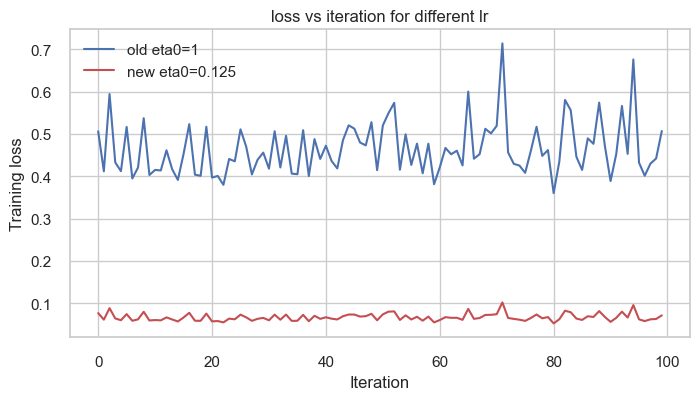

In [137]:
n_iter = 100
best_bin_clf = Perceptron(max_iter=1000, random_state=2094, eta0=0.125) # eta0 obtained from gridsearch
loss_best_clf = []
for i in range(n_iter):
    best_bin_clf.partial_fit(x_train, y_train_0, classes=np.array([1,-1]))
    y_hat_0 = best_bin_clf.decision_function(x_train)
    loss_best_clf.append(hinge_loss(y_train_0, y_hat_0))
    
plt.figure(figsize=(8,4))
plt.plot(np.arange(n_iter), loss_clf1, "b-", label="old eta0=1")
plt.plot(np.arange(n_iter), loss_best_clf, "r-", label="new eta0=0.125")
plt.ylabel("Training loss")
plt.xlabel("Iteration")
plt.title("loss vs iteration for different lr")
plt.grid(True)
plt.legend()
plt.show()

In [138]:
best_bin_clf

Perceptron(eta0=0.125, random_state=2094)

In [139]:
bin_clf_gscv.best_estimator_

Perceptron(eta0=0.125)

In [141]:
best_bin_clf = bin_clf_gscv.best_estimator_
y_hat_train_0 = best_bin_clf.predict(x_train)
print(classification_report(y_train_0, y_hat_train_0))

              precision    recall  f1-score   support

        -1.0       0.99      0.99      0.99     54077
         1.0       0.95      0.95      0.95      5923

    accuracy                           0.99     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.99      0.99      0.99     60000



## Visualizing weight vector

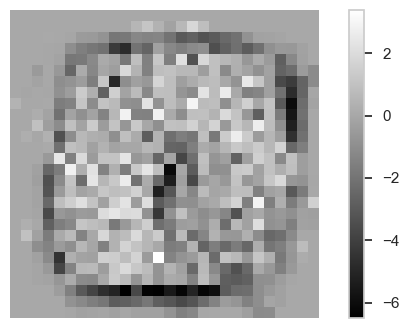

In [143]:
w = best_bin_clf.coef_
w_matrix = w.reshape(28,28)

plt.figure(figsize=(8,4))
plt.imshow(w_matrix, cmap="gray")
plt.axis(False)
plt.grid(False)
plt.colorbar()
plt.show()

## Visualizing activation

In [144]:
idx_n = np.where(y_train_0 == -1)
idx_pred_p = np.where(y_hat_train_0 == 1)
idx_fp = np.intersect1d(idx_n, idx_pred_p)

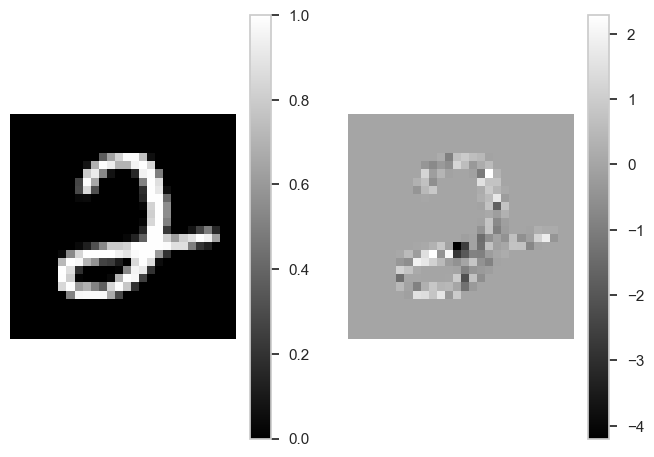

In [148]:
activation = w*x_train[idx_fp[0]].reshape(1,-1)
lin_out = activation.reshape(28,28)

plt.subplot(1,2,1)
plt.imshow(x_train[idx_fp[0]].reshape(28,28), cmap="gray")
plt.colorbar()
plt.axis(False)
plt.grid(False)

plt.subplot(1,2,2)
#lin_out[lin_out<0]=0
plt.imshow(lin_out, cmap="gray")
plt.colorbar()
plt.axis(False)
plt.grid(False)

plt.show()

In [149]:
print(np.sum(lin_out) + best_bin_clf.intercept_) # this values to sign function, val>0 means +ve means pred is 1 means img is 0 digit

[0.19332949]


# Assignment Week 5

In [ ]:
# From the MNIST dataset, create a new dataset by taking first 10000 images for training and next 2000 images for testing.

# Collect all digit-5 (Positive class) and digit-3 (Negative class) images and stack them properly as a single datamatrix.
# By convention, keep all digit-5 images from index 0 to i followed by digit-3 images from index i+1 to n (i denotes the end index of digit-5 images)
# Similarly, collect the respective labels and store it in a variable (Do sanity check).
# Set the label values to 1 for positive class and -1 for negative class.
# Instantiate a perceptron classifier with the below parameters
# random_state = 42
# learning rate = 1
# Train for 100 iterations (epoch)
# Should shuffle the dataset for each epoch (iteration)
# Include the intercept (bias) term.
# No regularization
# Use the training set for fitting the perceptron model and use the test data to make the predictions. Answer the below questions.

## Load Data: MNIST Digits

In [151]:
# Takes a lot of time for downloading dataset
# X, y = fetch_openml("mnist_784", version=1, return_X_y=True) # returns tuple of data dataframe and label dataframe
print(f"Shape of X: {X.shape}") # pixels per image = 784 = 28*28
print(f"Shape of y: {y.shape}")

## Shape of X: (70000, 784)
## Shape of y: (70000,)

# Converts pandas object to np array
# X = X.to_numpy()
# y = y.to_numpy()

Shape of X: (70000, 784)
Shape of y: (70000,)


In [19]:
# X values range from 0 to 255. We can transform it to 0 and 1 using MinMaxScaler
# X = MinMaxScaler().fit_transform(X)
print(f"Min val: {X.min()} | Max val: {X.max()}")

Min val: 0.0 | Max val: 1.0


## Preprocess

In [153]:
print(f"Type of X: {type(X)}")
print(f"Type of y: {type(y)}")

Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


## Data Spliting

In [155]:
x_train, x_test, y_train, y_test = X[:10000], X[10000:12000], y[:10000], y[10000:12000] 

# Binary Classification: digit '5' +ve, '3' -ve

## Remove other digits

In [180]:
x_train_5 = x_train[np.where(y_train == '5')]
x_train_3 = x_train[np.where(y_train == '3')]
y_train_5 = y_train[np.where(y_train == '5')]
y_train_3 = y_train[np.where(y_train == '3')]

x_test_5 = x_test[np.where(y_test == '5')]
x_test_3 = x_test[np.where(y_test == '3')]
y_test_5 = y_test[np.where(y_test == '5')]
y_test_3 = y_test[np.where(y_test == '3')]

print(f"Shape for digit 5")
print(f"x_train: {x_train_5.shape}\ny_train: {y_train_5.shape}\nx_test: {x_test_5.shape}\ny_test: {y_test_5.shape}\n")
print(f"Shape for digit 3")
print(f"x_train: {x_train_3.shape}\ny_train: {y_train_3.shape}\nx_test: {x_test_3.shape}\ny_test: {y_test_3.shape}\n")

x_train = np.concatenate((x_train_5,x_train_3))
y_train = np.concatenate((y_train_5,y_train_3))
x_test = np.concatenate((x_test_5,x_test_3))
y_test = np.concatenate((y_test_5,y_test_3))

print(f"Shape for data")
print(f"x_train: {x_train.shape}\ny_train: {y_train.shape}\nx_test: {x_test.shape}\ny_test: {y_test.shape}\n")

Shape for digit 5
x_train: (863, 784)
y_train: (863,)
x_test: (185, 784)
y_test: (185,)

Shape for digit 3
x_train: (1032, 784)
y_train: (1032,)
x_test: (196, 784)
y_test: (196,)

Shape for data
x_train: (1895, 784)
y_train: (1895,)
x_test: (381, 784)
y_test: (381,)



### Train data sanity check

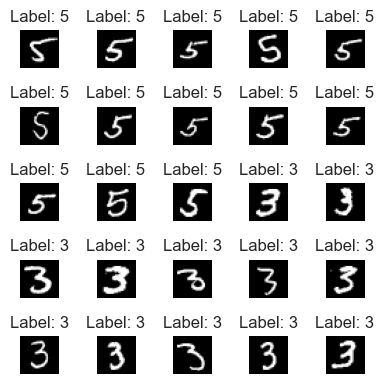

In [184]:
# Image visualization
n = 5
fig, ax = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(4,4))
offset = 850
for i in range(n):
    index = offset + i*n
    for j in range(n):
        ax[i,j].imshow(x_train[index+j].reshape(28,28), cmap="gray")
        ax[i,j].set_title(f"Label: {y_train[index+j]}")
        ax[i,j].set_axis_off()
plt.tight_layout()
plt.show()

### Test data sanity check

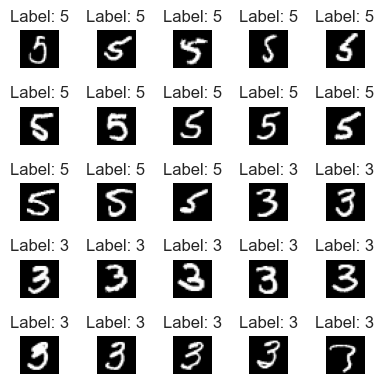

In [185]:
# Image visualization
n = 5
fig, ax = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(4,4))
offset = 172
for i in range(n):
    index = offset + i*n
    for j in range(n):
        ax[i,j].imshow(x_test[index+j].reshape(28,28), cmap="gray")
        ax[i,j].set_title(f"Label: {y_test[index+j]}")
        ax[i,j].set_axis_off()
plt.tight_layout()
plt.show()

## Modify labels: '5' is 1 +ve and '3' is -1 -ve

In [190]:
y_train[y_train == '5'] = 1
y_test[y_test == '5'] = 1

y_train[y_train == '3'] = -1
y_test[y_test == '3'] = -1

y_train = y_train.astype(int)
y_test = y_test.astype(int)

### Train data sanity check

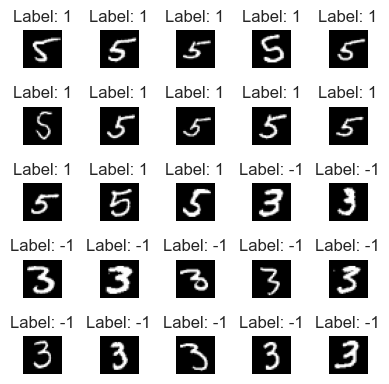

In [191]:
# Image visualization
n = 5
fig, ax = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(4,4))
offset = 850
for i in range(n):
    index = offset + i*n
    for j in range(n):
        ax[i,j].imshow(x_train[index+j].reshape(28,28), cmap="gray")
        ax[i,j].set_title(f"Label: {y_train[index+j]}")
        ax[i,j].set_axis_off()
plt.tight_layout()
plt.show()

### Test data sanity check

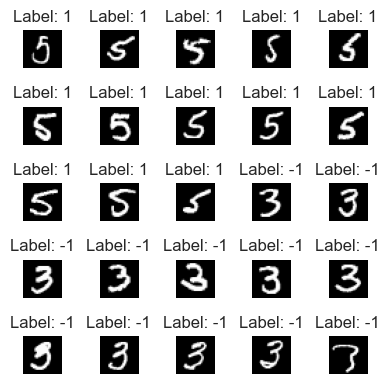

In [192]:
# Image visualization
n = 5
fig, ax = plt.subplots(nrows=n, ncols=n, sharex=True, sharey=True, figsize=(4,4))
offset = 172
for i in range(n):
    index = offset + i*n
    for j in range(n):
        ax[i,j].imshow(x_test[index+j].reshape(28,28), cmap="gray")
        ax[i,j].set_title(f"Label: {y_test[index+j]}")
        ax[i,j].set_axis_off()
plt.tight_layout()
plt.show()

## Perceptron model

### Q.1-5]

In [200]:
# Instantiate a perceptron classifier with the below parameters
# random_state = 42
# learning rate = 1
# Train for 100 iterations (epoch)
# Should shuffle the dataset for each epoch (iteration)
# Include the intercept (bias) term.
# No regularization

bin_clf = Perceptron(max_iter=100, random_state=42, eta0=1, shuffle=True, penalty=None, fit_intercept=True)

In [201]:
bin_clf.fit(x_train, y_train)
print(f"Dim of weights: {bin_clf.coef_.shape}")
print(f"Bias: {bin_clf.intercept_}")

Dim of weights: (1, 784)
Bias: [40.]


In [202]:
print(f"Training score: {round(bin_clf.score(x_train, y_train), 3)}")
print(f"Test score: {round(bin_clf.score(x_test, y_test), 3)}")

Training score: 0.958
Test score: 0.95


### Q.6]

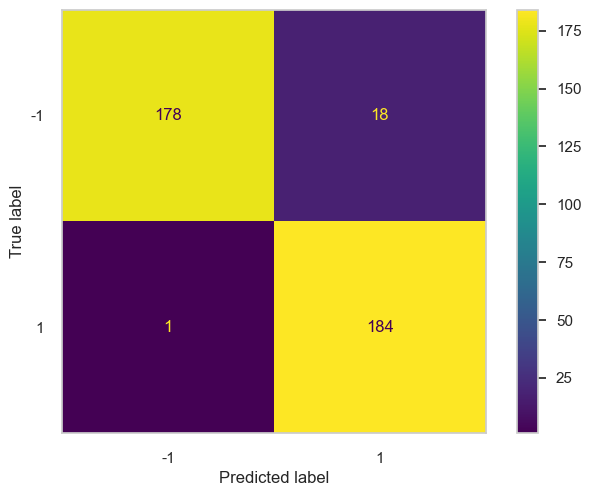

In [204]:
y_pred = bin_clf.predict(x_test) 
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

In [210]:
cm = cm_disp.confusion_matrix
tn = cm[0,0]
fn = cm[1,0]
fp = cm[0,1]
tp = cm[1,1]
print(f"TN: {tn}\t\tFP: {fp}\nFN: {fn}\t\tTP: {tp}")

precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tn+tp)/(tn+fn+tp+fp)

print(f"Precision: {precision}\nRecall: {recall}\nAccuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision: {precision}\nRecall: {recall}\nAccuracy: {accuracy}")

TN: 178		FP: 18
FN: 1		TP: 184
Precision: 0.9108910891089109
Recall: 0.9945945945945946
Accuracy: 0.9501312335958005
Precision: 0.9108910891089109
Recall: 0.9945945945945946
Accuracy: 0.9501312335958005


In [211]:
# shuffle set to false
bin_clf_shuffle_false = Perceptron(max_iter=100, random_state=42, eta0=1, shuffle=False, penalty=None, fit_intercept=True)

In [212]:
bin_clf_shuffle_false.fit(x_train, y_train)
print(f"Training score: {round(bin_clf_shuffle_false.score(x_train, y_train), 3)}")
print(f"Test score: {round(bin_clf_shuffle_false.score(x_test, y_test), 3)}")

y_pred = bin_clf_shuffle_false.predict(x_test) 

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision: {precision}\nRecall: {recall}\nAccuracy: {accuracy}")

Training score: 0.58
Test score: 0.559
Precision: 1.0
Recall: 0.0918918918918919
Accuracy: 0.5590551181102362


In [209]:
# Scores with shuffle True
# Precision: 0.9108910891089109
# Recall: 0.9945945945945946
# Accuracy: 0.9501312335958005

# Scores with shuffle False
# Precision: 1.0
# Recall: 0.0918918918918919
# Accuracy: 0.5590551181102362

# When Shuffle made to False
# Precision increased
# Recall decreased
# Accuracy Decreased

Precision: 0.9108910891089109
Recall: 0.9945945945945946
Accuracy: 0.9501312335958005


### Q.7,8]

In [213]:
# Apply linear PCA and reduce the dimention of the datapoints to 10. 
# Set n_components=10, random_state=1 for PCA. 
# Train perceptron classifier with same settings (shuffle = True) 
# and use the trained model to make predictions on test data. 
# Which of the following option gives the correct values inferred from confusion matrix?

#### Method 1

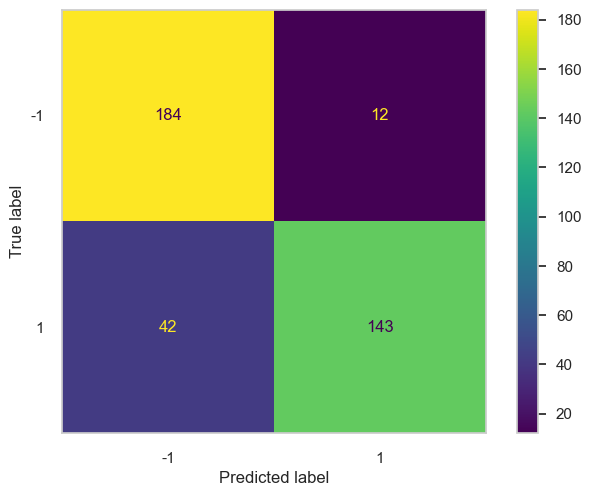

In [225]:
estimators = [('pca', PCA(n_components=10, random_state=1)),
             ('bin_clf', Perceptron(max_iter=100, random_state=42, eta0=1, shuffle=True, penalty=None, fit_intercept=True))]
pipe = Pipeline(estimators)
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

In [226]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision: {precision}\nRecall: {recall}\nAccuracy: {accuracy}")

Precision: 0.9225806451612903
Recall: 0.772972972972973
Accuracy: 0.8582677165354331


#### Method 2 (may be wrong)

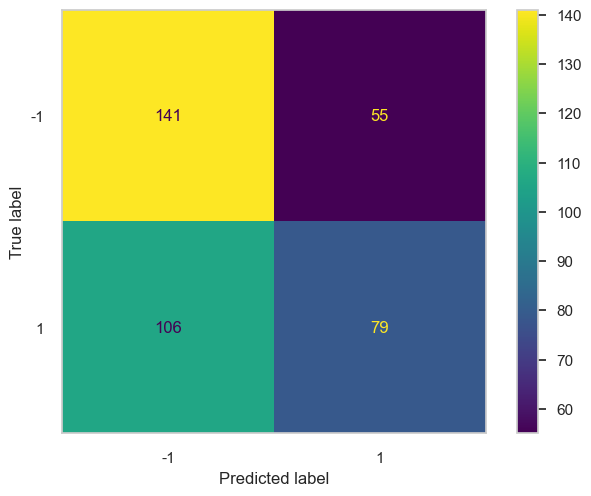

In [242]:
pca = PCA(n_components=10, random_state=1)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.fit_transform(x_test)

bin_clf = Perceptron(max_iter=100, random_state=42, eta0=1, shuffle=True, penalty=None, fit_intercept=True)
bin_clf.fit(x_train_transformed, y_train)
y_pred = bin_clf.predict(x_test_transformed) 
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

In [243]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision: {precision}\nRecall: {recall}\nAccuracy: {accuracy}")

Precision: 0.5895522388059702
Recall: 0.42702702702702705
Accuracy: 0.5774278215223098


In [244]:
tp, tn, fp, fn = 93, 119, 77, 92

precision = tp/(tp+fp)
recall = tp/(tp+fn)
accuracy = (tn+tp)/(tn+fn+tp+fp)

print(f"Precision: {precision}\nRecall: {recall}\nAccuracy: {accuracy}")

Precision: 0.5470588235294118
Recall: 0.5027027027027027
Accuracy: 0.5564304461942258


### Q.9]

In [245]:
# In the same model setup after PCA reduction, now provide L2 regularization by setting penalty = 'l2' 
# and regularization parameter value alpha = 0.01, 
# refit the classifier on training data, make predictions on test data and 
# observe the accuracy, precision score and recall score. 
# Does regularization improved the accuracy, precision and recall score of the model?

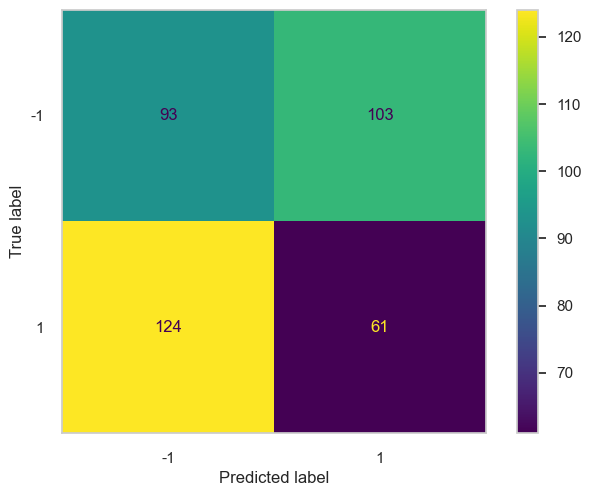

In [246]:
pca = PCA(n_components=10, random_state=1)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.fit_transform(x_test)

bin_clf = Perceptron(max_iter=100, random_state=42, eta0=1, shuffle=True, penalty="l2", fit_intercept=True, alpha=0.01)
bin_clf.fit(x_train_transformed, y_train)
y_pred = bin_clf.predict(x_test_transformed) 
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

In [247]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision: {precision}\nRecall: {recall}\nAccuracy: {accuracy}")

Precision: 0.3719512195121951
Recall: 0.32972972972972975
Accuracy: 0.4041994750656168


### Q.10]

In [248]:
# In the same model setup after PCA reduction, now provide L1 regularization by setting penalty = 'l1'
# and regularization parameter value alpha = 0.01, refit the classifier on training data, 
# make predictions on test data and observe the accuracy, precision score and recall score. 
# Does L1 regularization improve the accuracy, precision and recall score compared to L2 regularization?

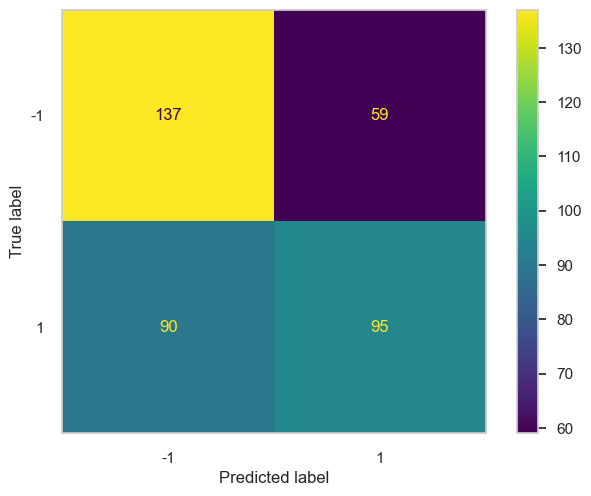

In [249]:
pca = PCA(n_components=10, random_state=1)
x_train_transformed = pca.fit_transform(x_train)
x_test_transformed = pca.fit_transform(x_test)

bin_clf = Perceptron(max_iter=100, random_state=42, eta0=1, shuffle=True, penalty="l1", fit_intercept=True, alpha=0.01)
bin_clf.fit(x_train_transformed, y_train)
y_pred = bin_clf.predict(x_test_transformed) 
cm_disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.grid(False)
plt.show()

In [250]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precision: {precision}\nRecall: {recall}\nAccuracy: {accuracy}")

Precision: 0.6168831168831169
Recall: 0.5135135135135135
Accuracy: 0.6089238845144357


# END